# Lending Club EDA Part 1

The purpose of this notebook is to visualize and prepare the dataset for modeling. Prior to Lending Club EDA Part 2[text](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c), I visualize distributions in the data with only a few of the features that I felt had high feature importance. This is a broad spectrum look at correlation across the board and a more granular analysis on loan_status by state.

In [2]:
import pandas as pd
from sqlalchemy import create_engine
from pandas_profiling import ProfileReport
import os
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import datetime as datetime
import pickle

In [3]:
with open('lending_club_missingbals_pick.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)

# Defining the Target Variable 'Default':

In [4]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

#there are 40 defaulted loans out of 2260668 total loans

0    2260628
1         40
Name: TARGET, dtype: int64

In [5]:
'%f' % ((40/2260628) * 100)

#Defaulted loans only account for .0018% of all loans

'0.001769'

In [6]:
df.shape

(2260668, 109)

# Plotting Distribution of Target Variables: 

In [7]:
print(str(df['TARGET'].value_counts()[0]), df['TARGET'].value_counts()[0]/len(df) * 100)
print(str(df['TARGET'].value_counts()[1]), df['TARGET'].value_counts()[1]/len(df) * 100)

2260628 99.99823061148298
40 0.0017693885170224023


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='TARGET', ylabel='count'>

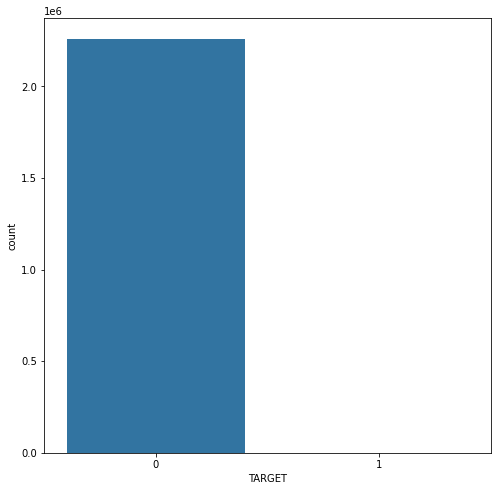

In [8]:
plt.figure(figsize=(8, 8))
sns.countplot('TARGET', data=df)

It's evident there is a class imbalance

# Correlation heatmap for each of the variables in the imbalanced dataset

- positive means an increase in X leads to increase in Y
- negative means an decrease in X leads to decrease in Y

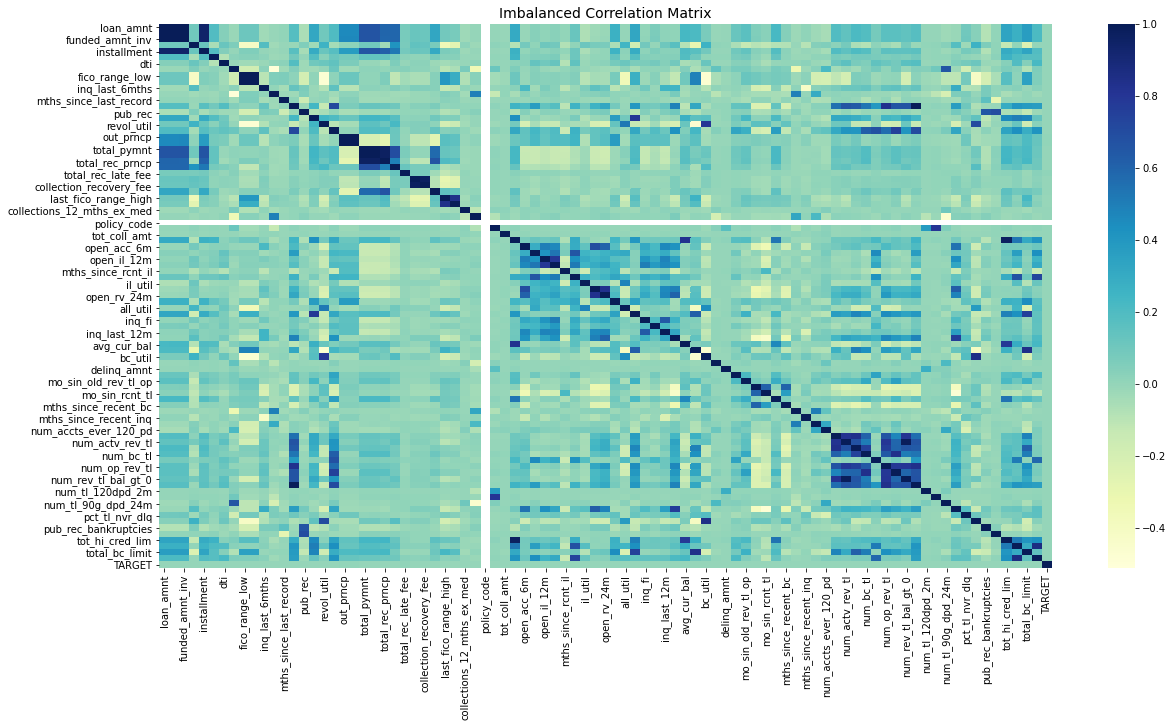

In [9]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)

plt.show()

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#pd.reset_option('display.float_format')

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,TARGET
count,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000,2260668.00000
mean,15046.93123,15041.66406,15023.43775,13.09283,445.80682,77992.29069,18.80995,0.30688,698.58820,702.58840,0.57683,34.54092,72.31284,11.61240,0.19753,16658.45808,50.29757,24.16255,4206.89144,4205.96536,12082.55683,12064.39465,9505.77159,2431.38765,1.51845,143.87914,23.98257,3429.34594,687.66100,675.53973,0.01814,44.16422,1.00000,0.00415,225.49695,142492.19520,0.57642,1.71453,0.41727,0.96402,12.68031,21902.99575,69.14098,0.79584,1.69635,3581.79147,57.03230,34288.75804,0.62481,0.91130,1.25636,4.42159,13344.04739,11016.57385,55.95163,0.00846,12.36967,125.73776,180.94781,13.83682,8.22605,1.52096,24.49268,37.52945,6.10624,11.71852,0.48466,3.65505,5.60990,4.75412,7.70382,8.33841,8.20777,13.94231,5.55998,11.61185,0.00059,0.00273,0.08036,2.01220,91.18244,41.02018,0.12812,0.04677,176254.95793,50731.72290,23041.20476,42372.54319,0.00002
std,9190.24549,9188.41302,9192.33168,4.83214,267.17353,112696.14762,14.18741,0.86723,33.01038,33.01124,0.88596,15.29179,10.54823,5.64083,0.57051,22948.30503,24.74404,11.98745,7343.23852,7342.33297,9901.38319,9896.99175,8321.85208,2679.73784,11.84159,748.16401,131.22559,6018.24758,72.97044,111.09763,0.15081,10.91421,0.00000,0.06962,8385.10964,158175.24406,1.00450,2.71671,0.79792,1.45415,22.66614,38697.77305,17.24331,1.33940,2.43872,5286.19431,16.41753,36188.15152,1.26924,2.21884,2.11748,3.19894,16255.54203,16449.06759,29.97556,0.10481,726.46012,51.71414,95.645

In [ ]:
Seeing all missing values 

In [13]:
print(df.isna().sum().to_string())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
fico_range_low                    0
fico_range_high                   0
inq_last_6mths                    0
mths_since_last_delinq            0
mths_since_last_record            0
open_acc                          0
pub_rec                           0
revol_bal                   

# Removing the word 'month' from 'term' feature: 

In [14]:
df['term'] = df['term'].str.replace('months', '')

# Grouping Defaulted and Non Defaulted Loans by State:

In [15]:
non_default_state_df = pd.DataFrame(df[df['loan_status'] != 'Default'].groupby('addr_state')['loan_status'].count().sort_values())

In [16]:
default_state_df = pd.DataFrame(df[df['loan_status']== 'Default'].groupby('addr_state')['loan_status'].count().sort_values())

In [17]:
non_default_state_df

,loan_status
addr_state,
IA,14
ND,3591
ID,4308
SD,4549
WY,4748
VT,4937
ME,4974
AK,5231
DC,5356


In [18]:
default_state_df

,loan_status
addr_state,
NC,1
SC,1
RI,1
NJ,1
MO,1
MD,1
WA,1
HI,1
CT,1


In [19]:
combined_default_states_df = non_default_state_df.join(default_state_df, lsuffix='_caller', rsuffix='_other')

In [20]:
combined_default_states_df_dropped = combined_default_states_df.dropna()

In [21]:
combined_default_states_df_dropped_index_reset = combined_default_states_df_dropped.reset_index()

In [22]:
combined_default_states_df_dropped_index_reset

,addr_state,loan_status_caller,loan_status_other
0,RI,10004,1.00000
1,HI,10667,1.00000
2,KS,19108,1.00000
3,OR,26785,4.00000
4,SC,28002,1.00000
5,CT,35784,1.00000
6,MO,36083,1.00000
7,WA,47059,1.00000
8,AZ,53775,2.00000
9,MD,54007,1.00000


In [23]:
teststatedf = combined_default_states_df_dropped_index_reset

In [24]:
teststatedf['ratio'] = teststatedf.groupby('addr_state').apply(lambda s: s.loan_status_other.nunique()/s.loan_status_caller).values

In [25]:
teststatedf.sort_values(by = 'ratio')

,addr_state,loan_status_caller,loan_status_other,ratio
1,HI,10667,1.00000,0.00000
11,OH,75130,2.00000,0.00001
17,NY,186382,7.00000,0.00001
3,OR,26785,4.00000,0.00001
5,CT,35784,1.00000,0.00001
10,NC,62729,1.00000,0.00001
14,IL,91170,3.00000,0.00001
12,PA,76937,2.00000,0.00001
9,MD,54007,1.00000,0.00002
7,WA,47059,1.00000,0.00002


# Bar Graph Depicting Ratio of Defaulted and Non Defaulted Loans by State:

   addr_state  loan_status_caller  loan_status_other   ratio
0          RI               10004            1.00000 0.00002
1          HI               10667            1.00000 0.00000
2          KS               19108            1.00000 0.00003
3          OR               26785            4.00000 0.00001
4          SC               28002            1.00000 0.00009
5          CT               35784            1.00000 0.00001
6          MO               36083            1.00000 0.00005
7          WA               47059            1.00000 0.00002
8          AZ               53775            2.00000 0.00003
9          MD               54007            1.00000 0.00002
10         NC               62729            1.00000 0.00001
11         OH               75130            2.00000 0.00001
12         PA               76937            2.00000 0.00001
13         NJ               83131            1.00000 0.00004
14         IL               91170            3.00000 0.00001
15         FL           

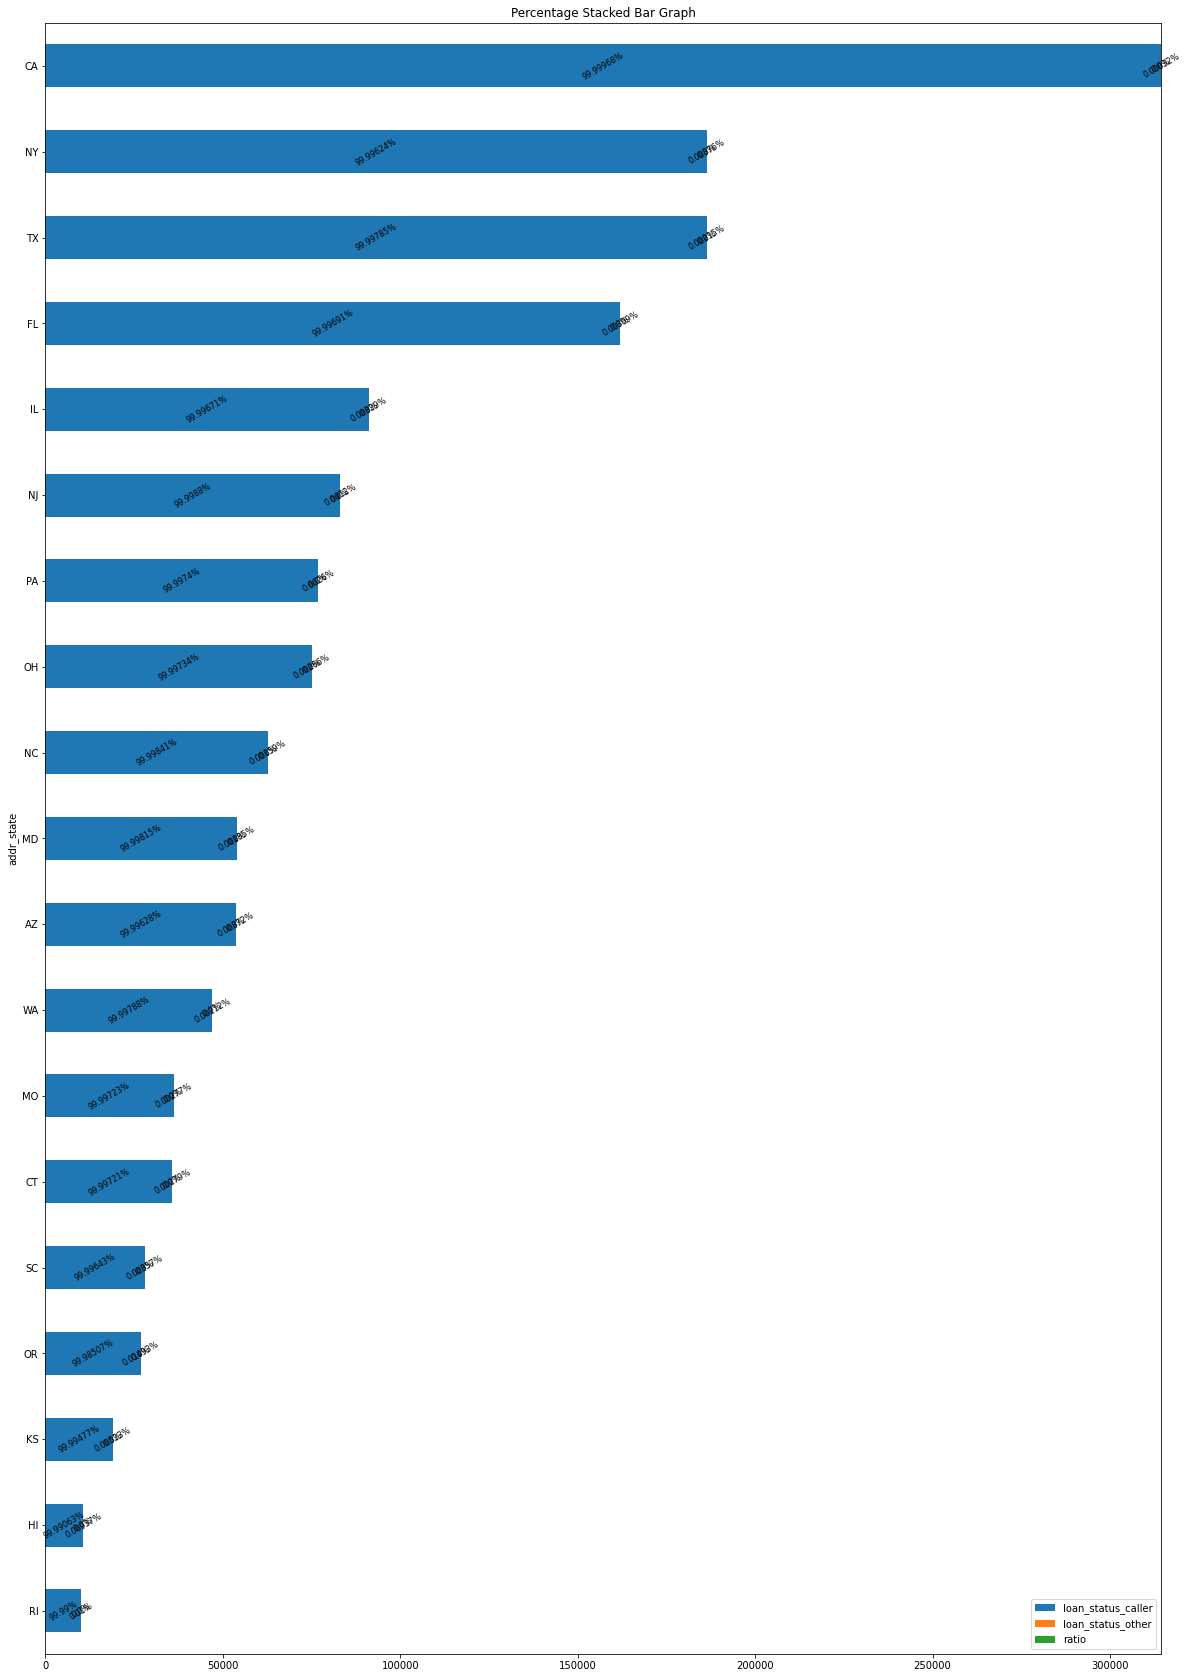

In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
  
# view dataset 
print(combined_default_states_df_dropped_index_reset) 
  
# plot a Stacked Bar Chart using matplotlib 
combined_default_states_df_dropped_index_reset.plot( 
  x = 'addr_state',  
  kind = 'barh',  
  stacked = True,  
  title = 'Percentage Stacked Bar Graph',  
  mark_right = True,
  figsize = (20,30)) 
  
df_total = combined_default_states_df_dropped_index_reset["loan_status_caller"] + combined_default_states_df_dropped_index_reset["loan_status_other"]
df_rel = combined_default_states_df_dropped_index_reset[combined_default_states_df_dropped_index_reset.columns[1:]].div(df_total, 0)*100
  
for n in df_rel: 
    for i, (cs, ab, pc) in enumerate(zip(combined_default_states_df_dropped_index_reset.iloc[:, 1:].cumsum(1)[n],  
                                         combined_default_states_df_dropped_index_reset[n], df_rel[n])): 
        plt.text(cs - ab / 2, i, str(np.round(pc, 5)) + '%',  
                 va = 'center', ha = 'center', rotation = 30, fontsize = 8)

California has the highest number of loans by state but Florida has the highest ratio of Defaulted over Non Defaulted Loans.

# Preliminary Feature Engineering:

Here I am preparing to break the data into train an test sets to conduct Synthetic Minority Oversampling Technique in the modeling stage. 

In [ ]:
#need to fix scaling problem

#1. Deal with missing values
#2. Scale featires
#3. remove outliers
#4. split data into train validation and test

In [27]:
#SMOTE to oversample the class fature

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer


X = df[['addr_state']]
y = df[['TARGET']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

vectorizer = CountVectorizer()
vectorizer.fit(X_train.values.ravel())
X_train=vectorizer.transform(X_train.values.ravel())
X_test=vectorizer.transform(X_test.values.ravel())
X_train=X_train.toarray()
X_test=X_test.toarray()

# Split into training and test sets

# Testing Count Vectorizer

X_train = pd.DataFrame(X_train)

X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

sm =  pd.concat([X_resample, y_resampled], axis=1)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


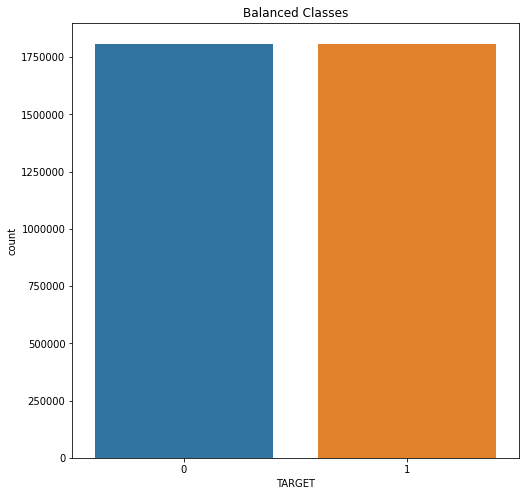

In [28]:
plt.figure(figsize=(8, 8))
sns.countplot('TARGET', data=sm)
plt.title('Balanced Classes')
plt.ticklabel_format(style='plain', axis='y')
plt.show()